#lab6

In [20]:
pip install jupyter-ai~=1.0

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install jupyter-ai[all]

Note: you may need to restart the kernel to use updated packages.


In [22]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [23]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [24]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [25]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


In [26]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [27]:
sql = " select * from name inner join income on name.fips = income.fips "

In [28]:
import pandas as pd

df = pd.read_sql(sql,conn)

df.head()

/tmp/ipykernel_9788/2786905311.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql,conn)


,fips,name,fips,income,year
0,01,Alabama,01,36879,2005
1,02,Alaska,02,56234,2005
2,04,Arizona,04,44282,2005
3,05,Arkansas,05,34999,2005
4,06,California,06,53629,2005


In [29]:
%%ai gpt4
what is in the {df} in {In[9]}

The provided data represents the income details of different states in the USA from the year 2005 to 2019. 

- `fips`: This column represents the Federal Information Processing Standard (FIPS) code, which is a five-digit code that uniquely identifies counties and county equivalents in the United States.

- `name`: This column represents the name of the state.

- `income`: This column represents the income of the state for a particular year.

- `year`: This column represents the year in which the income was recorded. 

The data spans from 2005 to 2019 and covers multiple states like Alabama, Alaska, Arizona, Arkansas, California, Colorado, Delaware, and the District of Columbia. The income data seems to be represented in some form of currency, likely US dollars. 

The data is being loaded from an SQL database into a pandas DataFrame using the `read_sql` function. The first few rows of the DataFrame are then displayed using the `head` function.

In [30]:
%%ai gpt4 -f code

calculate the income growth rate all states from the {df} in {In[9]}
display the result on chart

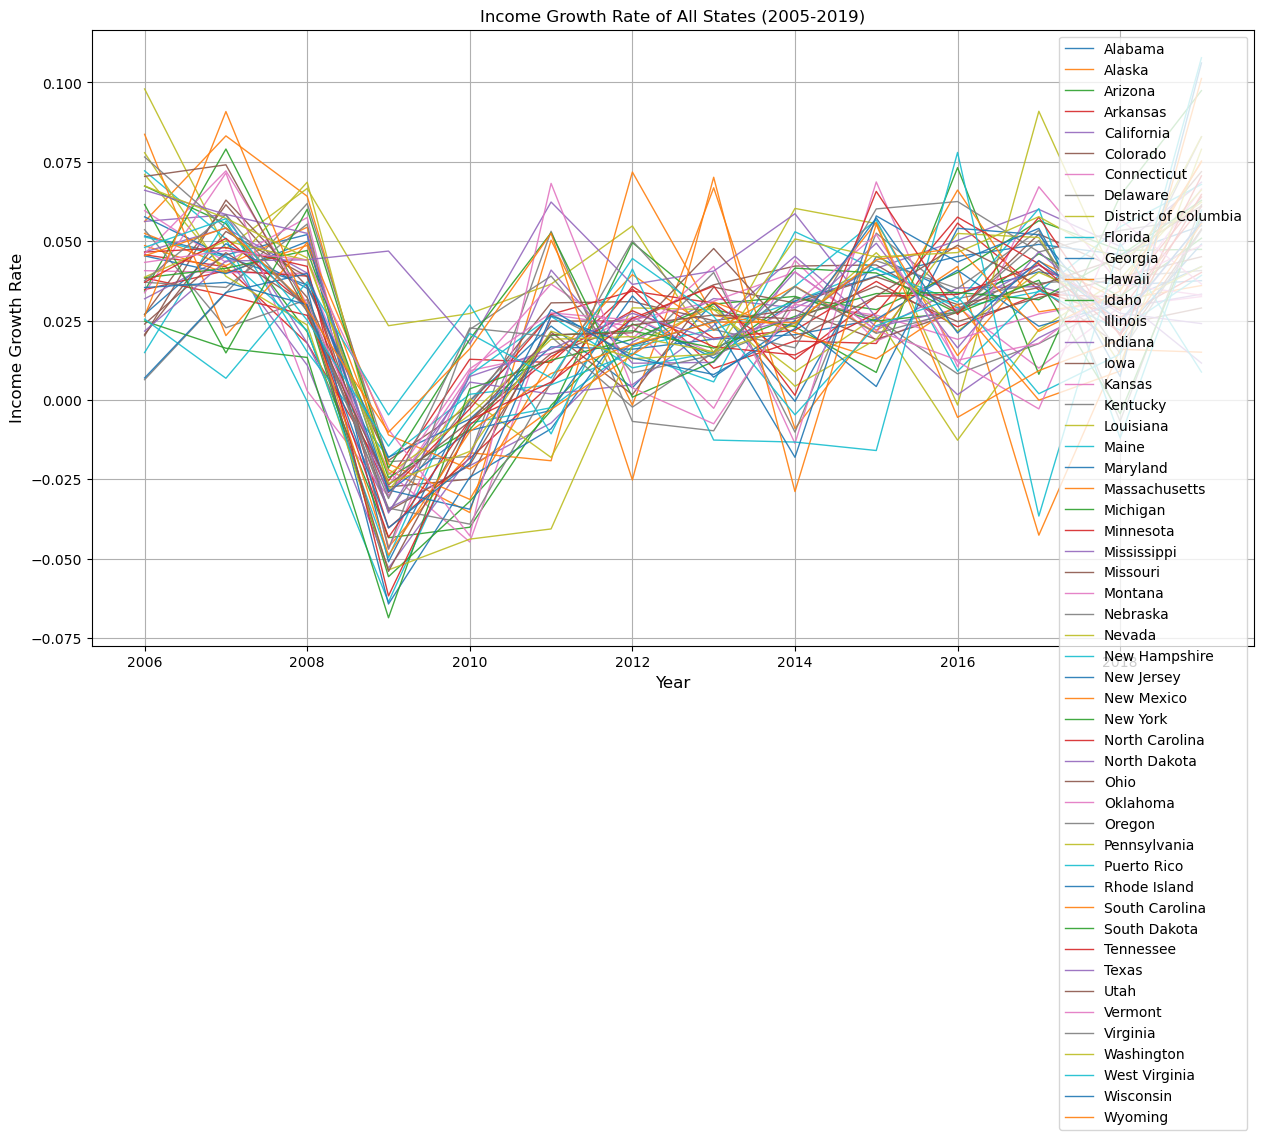

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is named df
df = df.sort_values(["name", "year"])

# Calculate income growth rate
df["growth_rate"] = df.groupby("name")["income"].pct_change()

# Pivot the data to prepare for chart
pivot_df = df.pivot(index="year", columns="name", values="growth_rate")

# Plot the data
plt.figure(figsize=(15,8))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='', linewidth=1, alpha=0.9, label=column)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Income Growth Rate", fontsize=12)
plt.title("Income Growth Rate of All States (2005-2019)", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid()
plt.show()

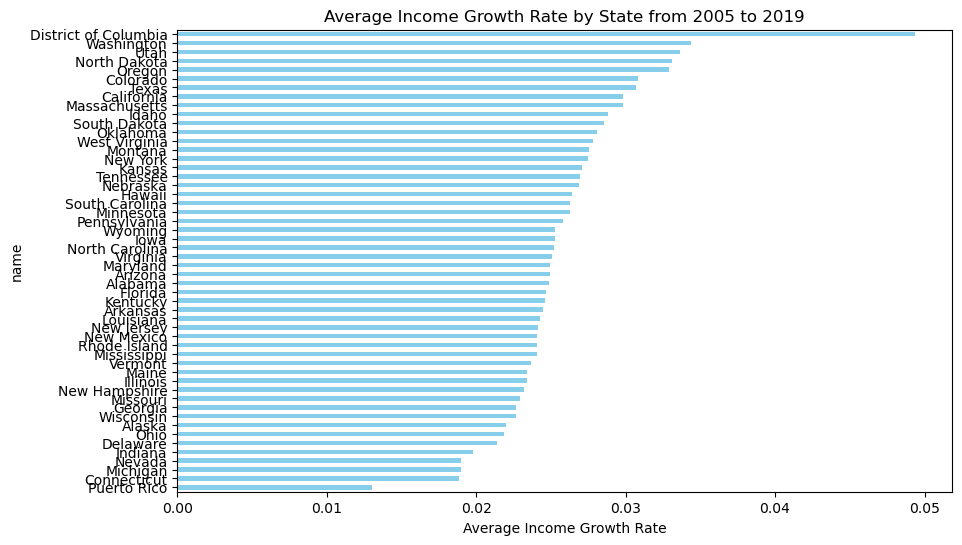

In [35]:

import matplotlib.pyplot as plt

# Create a pivot table with 'name' as index, 'year' as columns and 'income' as values
pivot_df = df.pivot(index='name', columns='year', values='income')

# Calculate the income growth rate
pivot_df = pivot_df.pct_change(axis='columns') 

# Calculate the average income growth rate for each state
average_growth_rate = pivot_df.mean(axis='columns')

# Sort the Series in descending order
sorted_growth_rate = average_growth_rate.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10,6))
sorted_growth_rate.plot(kind='barh', color='skyblue')
plt.xlabel('Average Income Growth Rate')
plt.title('Average Income Growth Rate by State from 2005 to 2019')
plt.gca().invert_yaxis()
plt.show()




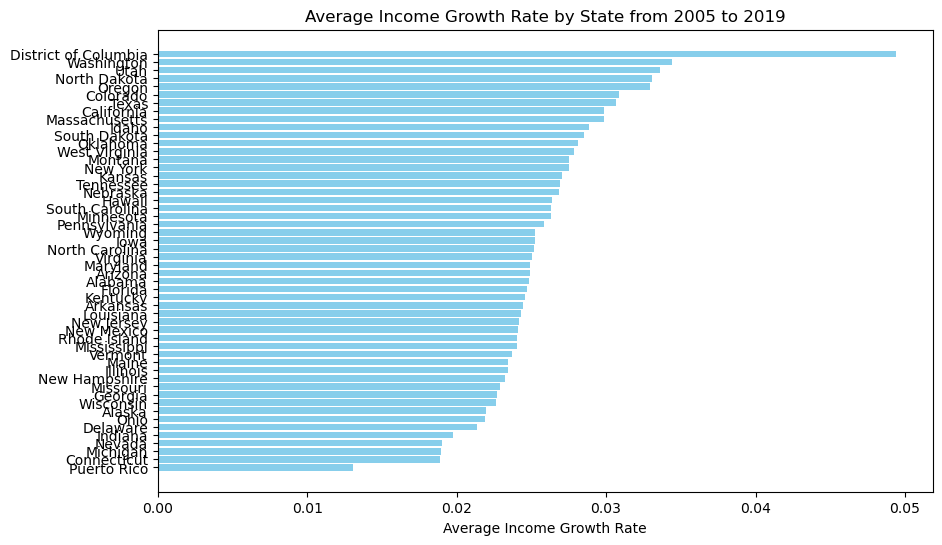

In [37]:

import matplotlib.pyplot as plt

# Calculate income growth rate for each state
df['income_growth_rate'] = df.groupby('name')['income'].pct_change()

# Calculate average income growth rate for each state
average_growth_rate = df.groupby('name')['income_growth_rate'].mean().reset_index()

# Sort states by average income growth rate
sorted_growth_rate = average_growth_rate.sort_values('income_growth_rate', ascending=False)

# Plot the result
plt.figure(figsize=(10,6))
plt.barh(sorted_growth_rate['name'], sorted_growth_rate['income_growth_rate'], color='skyblue')
plt.xlabel('Average Income Growth Rate')
plt.title('Average Income Growth Rate by State from 2005 to 2019')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame df
df = pd.DataFrame({
    'fips': ['01', '02', '04', '05', '06', '05', '06', '08', '10', '11'],
    'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Arkansas', 'California', 'Colorado', 'Delaware', 'District of Columbia'],
    'fips': ['01', '02', '04', '05', '06', '05', '06', '08', '10', '11'],
    'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]
})

# Calculate income growth rate
df['income_growth_rate'] = df.groupby('name')['income'].pct_change()

# Filter out the rows with missing growth rate
df_growth = df[df['income_growth_rate'].notna()]

# Plot income growth rate for each state
plt.figure(figsize=(15, 6))
for state in df_growth['name'].unique():
    state_data = df_growth[df_growth['name'] == state]
    plt.plot(state_data['year'], state_data['income_growth_rate'], label=state)

plt.xlabel('Year')
plt.ylabel('Income growth rate')
plt.title('Income growth rate for each state')
plt.legend()
plt.show()

In [ ]:
df['income'] = pd.to_numeric(df['income'])
df_grouped = df.groupby(['fips', 'name']).agg({'income':['min', 'max'], 'year':['min', 'max']})
df_grouped.columns = ['min_income', 'max_income', 'start_year', 'end_year']
df_grouped['income_growth_rate'] = (df_grouped['max_income'] - df_grouped['min_income']) / df_grouped['min_income'] / (df_grouped['end_year'] - df_grouped['start_year'])
df_grouped.reset_index(inplace=True)
df_grouped[['fips', 'name', 'income_growth_rate']]

In [ ]:
import pandas as pd

# Assuming the data is stored in a dataframe df
data = {
    'fips': ['01', '02', '04', '05', '06', '05', '06', '08', '10', '11'],
    'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Arkansas', 'California', 'Colorado', 'Delaware', 'District of Columbia'],
    'fips_1': ['01', '02', '04', '05', '06', '05', '06', '08', '10', '11'],
    'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]
}

df = pd.DataFrame(data)

# Filter the dataframe for the state of VA (assumption: fips code for VA is '51')
va_data = df[df['fips'] == '51']

# Calculate the income growth rate
va_data['income_growth_rate'] = va_data['income'].pct_change()

va_data